# Thera Bank Personal Loan Campaign

### Data Description:
The dataset contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

### Domain:
Banking

### Context:
This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to 
personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability 
customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to 
devise campaigns with better target marketing to increase the success ratio with a minimal budget.

### Attribute Information:
- ID: Customer ID
- Age: Customer's age in completed years
- Experience: #years of professional experience
- Income: Annual income of the customer
- ZIP Code: Home Address ZIP code
- Family: Family size of the customer
- CCAvg: Avg. spending on credit cards per month
- Education: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
- Mortgage: Value of house mortgage if any
- Personal Loan: Did this customer accept the personal loan offered in the last campaign?
- Securities Account: Does the customer have a securities account with the bank?
- CD Account: Does the customer have a certificate of deposit (CD) account with the bank?
- Online: Does the customer use internet banking facilities?
- Credit card: Does the customer use a credit card issued by the bank?

### Learning Outcomes:
- Exploratory Data Analysis
- Preparing the data to train a model
- Training and making predictions using a classification model
- Model evaluation

### Objective:
The classification goal is to predict the likelihood of a liability customer buying personal loans.

In [1637]:
# GITHUB repository: https://github.com/yogesh-singal/PGP-AIML

#### 1. Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation. - 5 marks

In [1638]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [1639]:
data = pd.read_csv('Bank_Personal_loan_Modelling.csv');

In [1640]:
data.shape

(5000, 14)

In [1641]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [1642]:
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [1643]:
data.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

**Insights**
- `There are no NULL values in the data`
- `The datatypes of categorical columns need to be changed to category. ID and ZIP Code should be of object datatype`

In [1644]:
data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00
mean,2500.50,45.34,20.10,73.77,93152.50,2.40,1.94,1.88,56.50,0.10,0.10,0.06,0.60,0.29
std,1443.52,11.46,11.47,46.03,2121.85,1.15,1.75,0.84,101.71,0.29,0.31,0.24,0.49,0.46
min,1.00,23.00,-3.00,8.00,9307.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1250.75,35.00,10.00,39.00,91911.00,1.00,0.70,1.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,2500.50,45.00,20.00,64.00,93437.00,2.00,1.50,2.00,0.00,0.00,0.00,0.00,1.00,0.00
75%,3750.25,55.00,30.00,98.00,94608.00,3.00,2.50,3.00,101.00,0.00,0.00,0.00,1.00,1.00
max,5000.00,67.00,43.00,224.00,96651.00,4.00,10.00,3.00,635.00,1.00,1.00,1.00,1.00,1.00


**Insights**
- `The column Experience seems to have negative values.`
- `No other column has NULLs or negative values.`

#### Change the datatype of categorical columns to category, datatype of ID and ZIP Code should be object. Datatype of ZIP code will be changed later because the value is needed for comparisons in the interim

In [1645]:
data['Family'] = data['Family'].astype('category')
data['Education'] = data['Education'].astype('category')
data['Securities Account'] = data['Securities Account'].astype('category')
data['CD Account'] = data['CD Account'].astype('category')
data['Online'] = data['Online'].astype('category')
data['CreditCard'] = data['CreditCard'].astype('category')
data['ID'] = data['ID'].astype('object')
print (data.dtypes)

ID                      object
Age                      int64
Experience               int64
Income                   int64
ZIP Code                 int64
Family                category
CCAvg                  float64
Education             category
Mortgage                 int64
Personal Loan            int64
Securities Account    category
CD Account            category
Online                category
CreditCard            category
dtype: object


In [1646]:
data.describe()

,Age,Experience,Income,ZIP Code,CCAvg,Mortgage,Personal Loan
count,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00
mean,45.34,20.10,73.77,93152.50,1.94,56.50,0.10
std,11.46,11.47,46.03,2121.85,1.75,101.71,0.29
min,23.00,-3.00,8.00,9307.00,0.00,0.00,0.00
25%,35.00,10.00,39.00,91911.00,0.70,0.00,0.00
50%,45.00,20.00,64.00,93437.00,1.50,0.00,0.00
75%,55.00,30.00,98.00,94608.00,2.50,101.00,0.00
max,67.00,43.00,224.00,96651.00,10.00,635.00,1.00


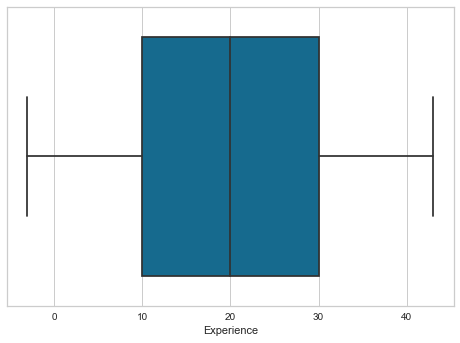

In [1647]:
sns.boxplot(data.Experience)

In [1648]:
data[data.Experience < 0].count()

ID                    52
Age                   52
Experience            52
Income                52
ZIP Code              52
Family                52
CCAvg                 52
Education             52
Mortgage              52
Personal Loan         52
Securities Account    52
CD Account            52
Online                52
CreditCard            52
dtype: int64

In [1649]:
data[data.Experience < 0]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,90,25,-1,113,94303,4,2.30,3,0,0,0,0,0,1
226,227,24,-1,39,94085,2,1.70,2,0,0,0,0,0,0
315,316,24,-2,51,90630,3,0.30,3,0,0,0,0,1,0
451,452,28,-2,48,94132,2,1.75,3,89,0,0,0,1,0
524,525,24,-1,75,93014,4,0.20,1,0,0,0,0,1,0
536,537,25,-1,43,92173,3,2.40,2,176,0,0,0,1,0
540,541,25,-1,109,94010,4,2.30,3,314,0,0,0,1,0
576,577,25,-1,48,92870,3,0.30,3,0,0,0,0,0,1
583,584,24,-1,38,95045,2,1.70,2,0,0,0,0,1,0
597,598,24,-2,125,92835,2,7.20,1,0,0,1,0,0,1


**Insight**
- `Negative values for Experience do not make any sense. They need to be fixed. `

In [1650]:
data[data.Experience == 0].count()

ID                    66
Age                   66
Experience            66
Income                66
ZIP Code              66
Family                66
CCAvg                 66
Education             66
Mortgage              66
Personal Loan         66
Securities Account    66
CD Account            66
Online                66
CreditCard            66
dtype: int64

In [1651]:
data[data.Experience == 0].groupby(by=['Age']).count()

,ID,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,,,,,,,,,,,,,
24,11,11,11,11,11,11,11,11,11,11,11,11,11
25,17,17,17,17,17,17,17,17,17,17,17,17,17
26,28,28,28,28,28,28,28,28,28,28,28,28,28
27,8,8,8,8,8,8,8,8,8,8,8,8,8
29,1,1,1,1,1,1,1,1,1,1,1,1,1
30,1,1,1,1,1,1,1,1,1,1,1,1,1


In [1652]:
#df = data.drop(['ID','ZIP Code'], axis=1)
df = data[['Age','Experience']]
df1 = df[(df['Experience'] >= 0) & (df['Age'] <= 30)].groupby(by=['Age']).median()
print(df1)

     Experience
Age            
24            0
25            1
26            1
27            2
28            3
29            4
30            5


In [1653]:
print(df[df['Age'] == 24].mode())
print(df[df['Age'] == 25].mode())
print(df[df['Age'] == 26].mode())
print(df[df['Age'] == 27].mode())
print(df[df['Age'] == 28].mode())
print(df[df['Age'] == 29].mode())
print(df[df['Age'] == 30].mode())

   Age  Experience
0   24           0
   Age  Experience
0   25           1
   Age  Experience
0   26           0
   Age  Experience
0   27           3
   Age  Experience
0   28           3
   Age  Experience
0   29           3
    Age  Experience
0 30.00           4
1   nan           6


In [1654]:
data[data.Age < 30].count()

ID                    488
Age                   488
Experience            488
Income                488
ZIP Code              488
Family                488
CCAvg                 488
Education             488
Mortgage              488
Personal Loan         488
Securities Account    488
CD Account            488
Online                488
CreditCard            488
dtype: int64

**Insights**
- `Negative values for Experience all appear for younger people in their twenties.`
- `It makes sense to replace the negative values with 0. `
- `Checking for individuals with 0 Experience in the data also shows that 66 out of 488 customers(13.5%) under the age of 30 have 0 experience. Moreover, all individuals with 0 Experience are 30 or below in Age, thus validating our replacement strategy.`
- `Replacing with median or mode values may not give any better results `

In [1655]:
## Impute negative values in the Experience column and replace with 0. 
num = data._get_numeric_data()
num[num < 0] = 0

In [1656]:
data[data.Experience < 0]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard


#### 2. EDA: Study the data distribution in each attribute and target variable, share your findings (20 marks)
- Number of unique in each column?
- Number of people with zero mortgage?
- Number of people with zero credit card spending per month?
- Value counts of all categorical columns.
- Univariate and Bivariate
- Get data model ready

### Number of unique values in each column

In [1657]:
data.nunique()

ID                    5000
Age                     45
Experience              44
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

**Insights**
- `ID is unique for each customer and can be dropped for regression purposes`
- `ZIP Code is a nominal categorical variable but has 467 unique values. It is difficult to derive much information from it. Makes sense to drop it`

### Number of people with zero mortgage

In [1658]:
data[data.Mortgage == 0]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.00,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,4995,64,40,75,94588,3,2.00,3,0,0,0,0,1,0
4995,4996,29,3,40,92697,1,1.90,3,0,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.30,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.50,2,0,0,0,0,1,0


In [1659]:
## Group people with zero mortgage by Age and sort in descending order
data[data.Mortgage == 0].groupby(by=['Age']).count().sort_values(by='ID', ascending=False)

,ID,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,,,,,,,,,,,,,
43,109,109,109,109,109,109,109,109,109,109,109,109,109
35,109,109,109,109,109,109,109,109,109,109,109,109,109
58,104,104,104,104,104,104,104,104,104,104,104,104,104
52,102,102,102,102,102,102,102,102,102,102,102,102,102
54,99,99,99,99,99,99,99,99,99,99,99,99,99
59,98,98,98,98,98,98,98,98,98,98,98,98,98
41,94,94,94,94,94,94,94,94,94,94,94,94,94
30,93,93,93,93,93,93,93,93,93,93,93,93,93
34,91,91,91,91,91,91,91,91,91,91,91,91,91


**Insights**
- `There are 3462 customers with zero mortgage. That is a significant percentage(70%) of the total`
- `They are distributed across all age groups with no particular pattern`

### Number of people with zero credit card spending per month

In [1660]:
data[data.CCAvg == 0]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
63,64,42,17,32,94523,4,0.00,2,0,0,0,0,1,0
128,129,38,14,74,92182,2,0.00,1,0,0,1,0,1,0
198,199,27,3,59,94123,4,0.00,1,90,0,1,0,1,0
210,211,51,26,20,92131,2,0.00,1,0,0,0,0,0,0
215,216,38,14,92,95818,2,0.00,1,249,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4801,4802,34,10,88,94404,2,0.00,1,121,0,0,0,1,0
4826,4827,56,31,81,93943,2,0.00,3,225,0,0,0,0,0
4837,4838,36,10,183,95348,2,0.00,1,0,0,0,0,0,0
4910,4911,48,22,120,90291,1,0.00,1,0,0,0,0,1,0


In [1661]:
## Group people with zero mortgage by Age and sort in descending order
data[data.CCAvg == 0].groupby(by=['Age']).count().sort_values(by='ID', ascending=False)

,ID,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,,,,,,,,,,,,,
35,7,7,7,7,7,7,7,7,7,7,7,7,7
38,7,7,7,7,7,7,7,7,7,7,7,7,7
44,6,6,6,6,6,6,6,6,6,6,6,6,6
51,5,5,5,5,5,5,5,5,5,5,5,5,5
50,5,5,5,5,5,5,5,5,5,5,5,5,5
42,4,4,4,4,4,4,4,4,4,4,4,4,4
52,4,4,4,4,4,4,4,4,4,4,4,4,4
64,4,4,4,4,4,4,4,4,4,4,4,4,4
48,4,4,4,4,4,4,4,4,4,4,4,4,4


**Insights**
- `There are 106 customers with zero average credit card spending per month. This is a small percentage (2%) of the total `
- `They are distributed across all age groups with no particular pattern`

### Value counts of all categorical columns.

In [1662]:
data[['Personal Loan', 'Securities Account', 'CD Account','Online','CreditCard']].sum().sort_values()

CD Account            302.00
Personal Loan         480.00
Securities Account    522.00
CreditCard           1470.00
Online               2984.00
dtype: float64

**Insights**
Out of a total of 5000 customers:
- `302 have a CD Account with the bank`
- `480 accepted the Personal Loan from the bank in the last campaign`
- `522 have a Securities Account with the bank`
- `1470 have a Credit Card with the bank`
- `2984 use Internet banking facilities`

In [1663]:
df = data[['ID', 'Education']]
df.groupby(by=['Education']).count().sort_values(by='ID',ascending=False)

,ID
Education,
1,2096
3,1501
2,1403


**Insights**
Out of 5000 customers:
- `2096 have Undergraduate degrees`
- `1501 have Advanced/Professional degrees`
- `1403 have Graduate degrees`

In [1664]:
df = data[['ID', 'Family']]
df.groupby(by=['Family']).count().sort_values(by='ID',ascending=False)

,ID
Family,
1,1472
2,1296
4,1222
3,1010


**Insights**
Out of 5000 customers:
- `1472 have a family size of 1`
- `1296 have family size of 2`
- `1222 have family size of 4`
- `1010 have a family size of 3`

### Univariate and Bivariate analysis

- `Using CountPlot to visualize categorical columns and 
- `DistPlot to visualize the numerical columns

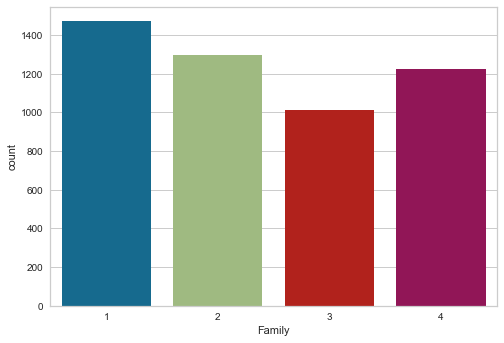

In [1665]:
sns.countplot(data.Family)

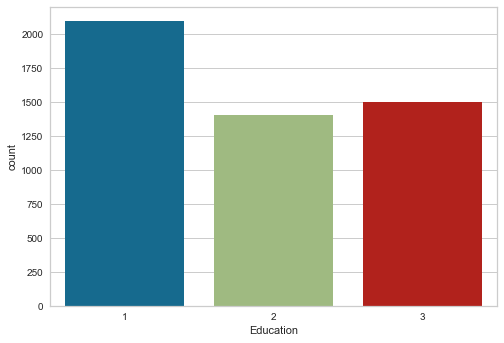

In [1666]:
sns.countplot(data.Education)

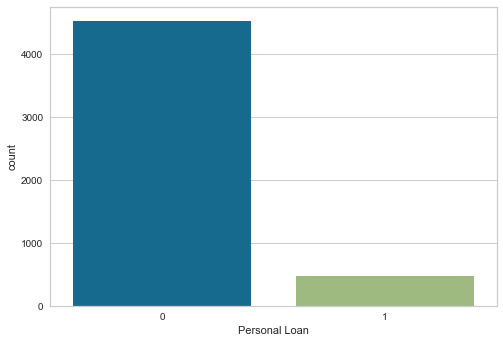

In [1667]:
sns.countplot(data['Personal Loan'])

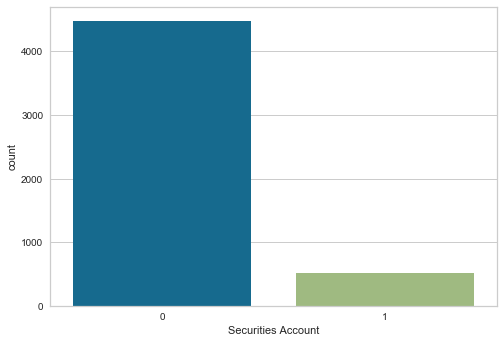

In [1668]:
sns.countplot(data['Securities Account'])

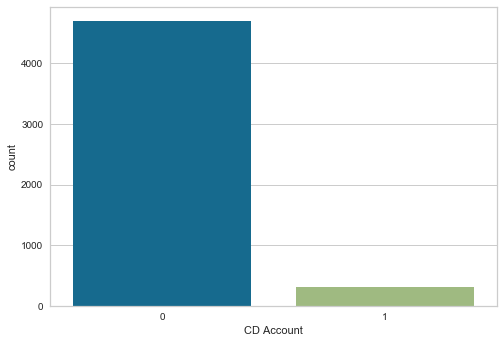

In [1669]:
sns.countplot(data['CD Account'])

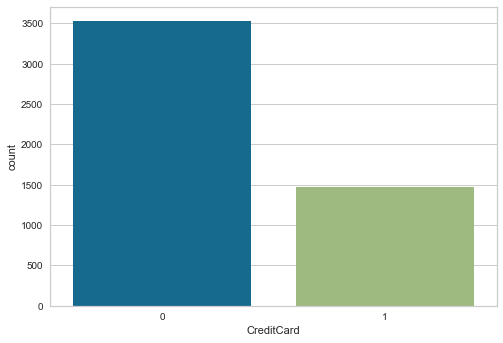

In [1670]:
sns.countplot(data['CreditCard'])

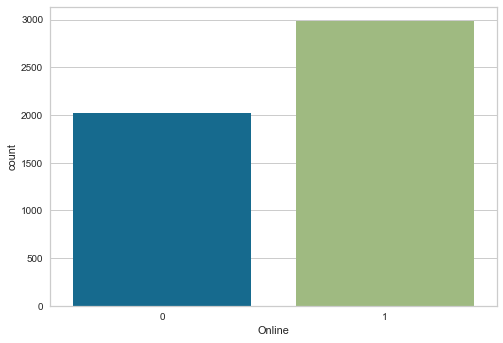

In [1671]:
sns.countplot(data.Online)

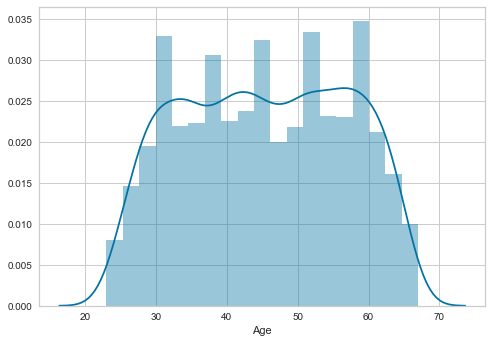

In [1672]:
sns.distplot(data.Age)

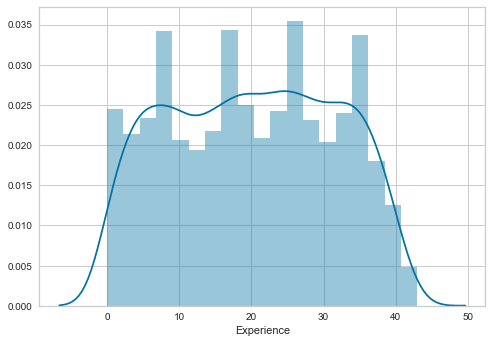

In [1673]:
sns.distplot(data.Experience)

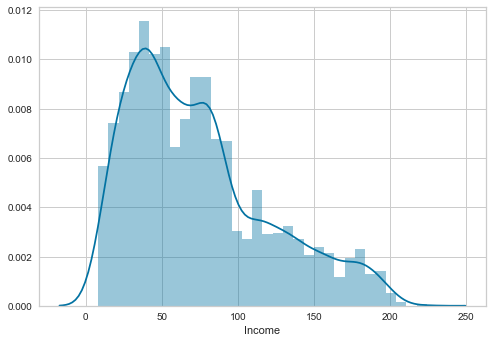

In [1674]:
sns.distplot(data.Income)

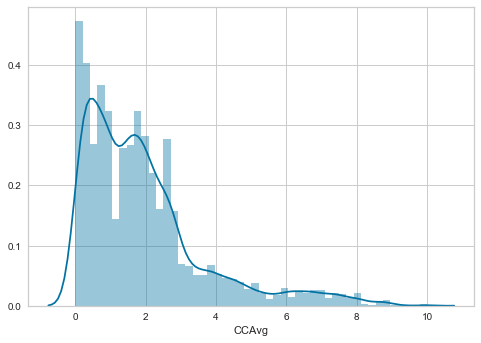

In [1675]:
sns.distplot(data.CCAvg)

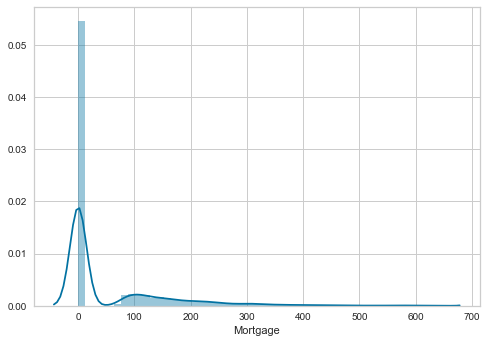

In [1676]:
sns.distplot(data.Mortgage)

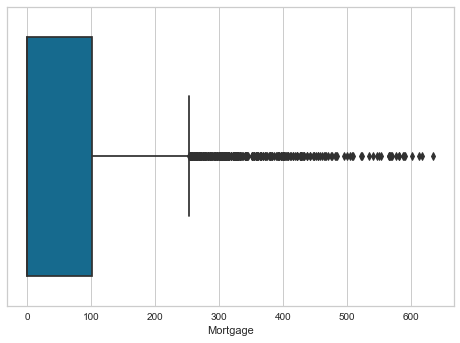

In [1677]:
sns.boxplot(data.Mortgage)

**Insights:**
- `Income, CCAvg and Mortgage data are skewed but we won't treat them. If we treat the data it will increase the bias`

In [1678]:
# Some ZIP codes have higher percentage of people taking Personal loans than others. Identify the ZIPs where people have taken Personal Loans
df = data.drop(['ID','Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage','Securities Account', 'CD Account','Online','CreditCard'], axis=1).groupby(by=['ZIP Code']).sum()
df1 = df[df['Personal Loan'] != 0]
df2 = df1.sort_values(by=['Personal Loan'],ascending=False).head(10)
topZIPs = df2.index.values
print(topZIPs)

[94720 94305 92093 94304 90095 90089 92182 94022 95051 95616]


In [1679]:
# Create a dummy column to categorize the data based on ZIPs where at least one Personal Loan has been issued
data['topZIPs']=data['ZIP Code'].isin(topZIPs) 
#Convert True/False values to 1/0
data['topZIPs']=data['topZIPs']*1

In [1680]:
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,topZIPs
0,1,25,1,49,91107,4,1.60,1,0,0,1,0,0,0,0
1,2,45,19,34,90089,3,1.50,1,0,0,1,0,0,0,1
2,3,39,15,11,94720,1,1.00,1,0,0,0,0,0,0,1
3,4,35,9,100,94112,1,2.70,2,0,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.00,2,0,0,0,0,0,1,0


In [1681]:
data[['topZIPs']].sum()

topZIPs    716
dtype: int64

In [1682]:
print(data.dtypes)

ID                      object
Age                      int64
Experience               int64
Income                   int64
ZIP Code                 int64
Family                category
CCAvg                  float64
Education             category
Mortgage                 int64
Personal Loan            int64
Securities Account    category
CD Account            category
Online                category
CreditCard            category
topZIPs                  int32
dtype: object


In [1683]:
#Change the datatypes of 'Personal Loan' and 'ZIP Code' columns now
data['Personal Loan'] = data['Personal Loan'].astype('category')
data['ZIP Code'] = data['ZIP Code'].astype('object')
data['topZIPs'] = data['topZIPs'].astype('category')

**Insights:**
- `There are certain ZIP codes where there is a higher rate of Personal Loan issuance. However, there seems to be a skew in the data since there are more customers in those ZIP codes as well.`
- `Also, since ZIP Code is a non-numeric column (it has a numerical value but from a numbers perpective it does not make sense) it is unsuitable as an input to the regression and can be dropped`
- `A dummy column is created instead flagging the ZIP Codes where Personal Loans have been issued and where they haven't `

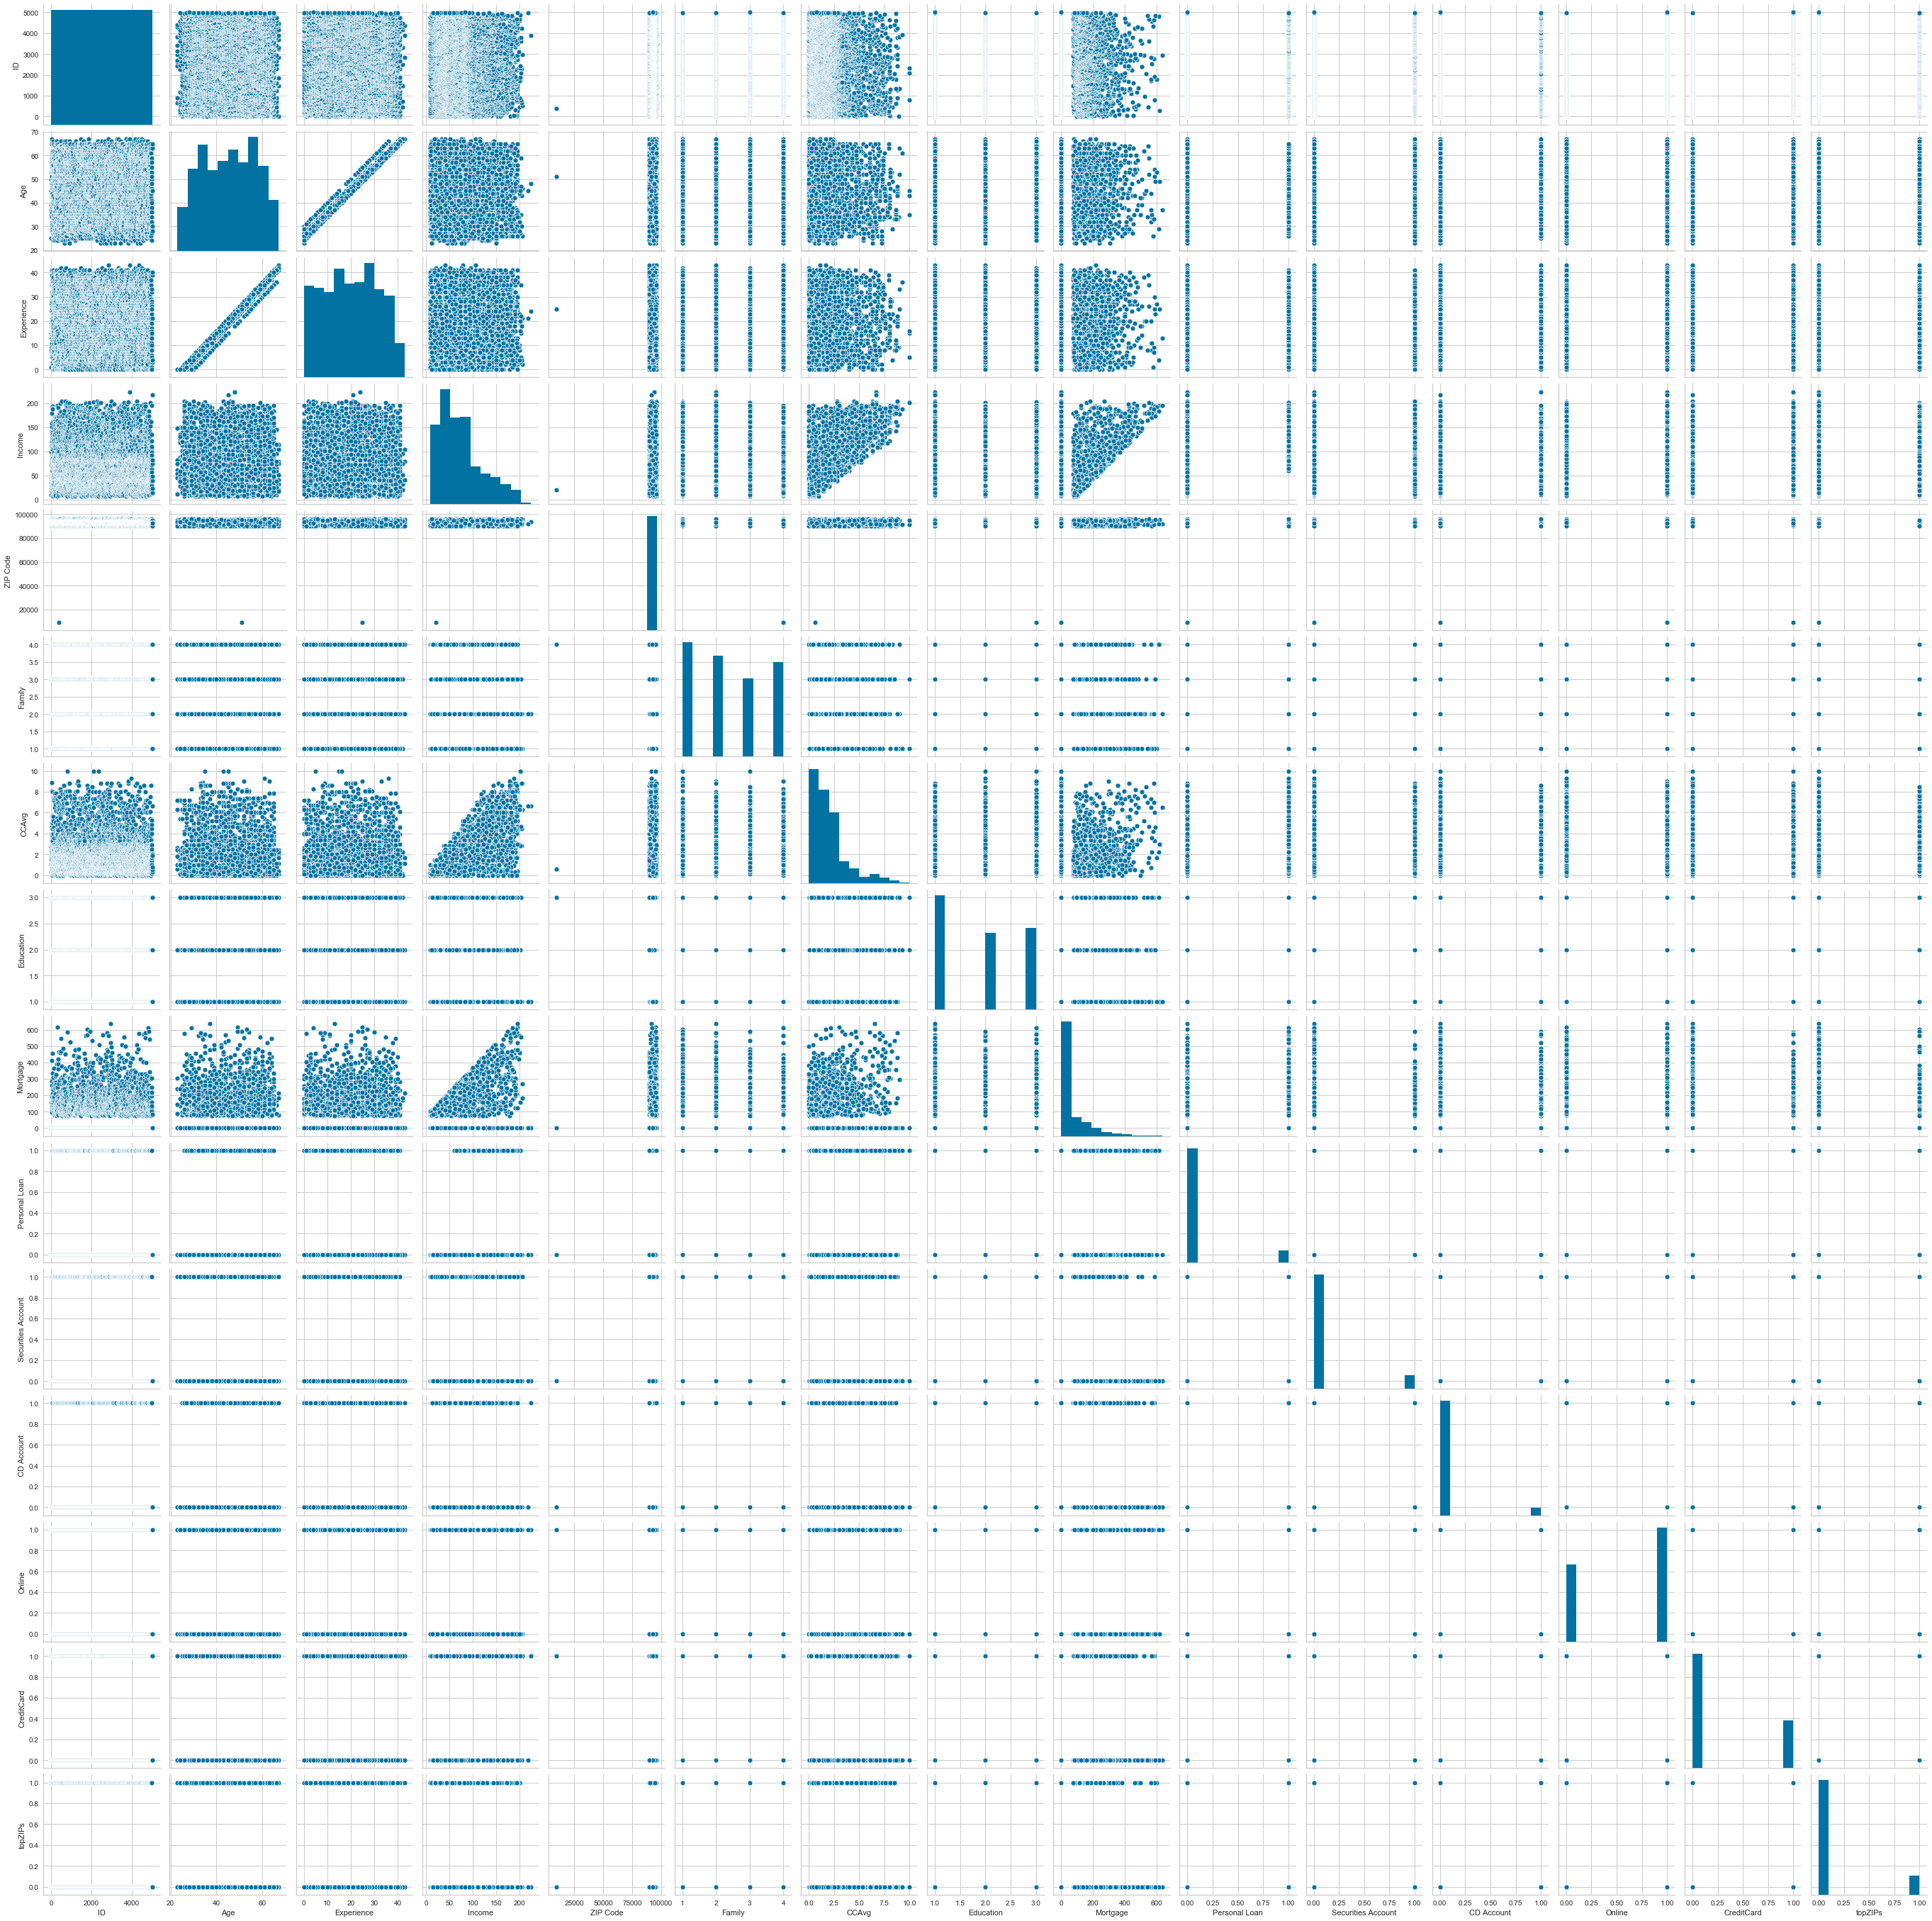

In [1684]:
sns.pairplot(data)
plt.show()

In [1685]:
# look at the target column 'Personal Loan' to understand how the data is distributed amongst the various values
data.groupby(["Personal Loan"]).mean()

,Age,Experience,Income,CCAvg,Mortgage
Personal Loan,,,,,
0,45.37,20.15,66.24,1.73,51.79
1,45.07,19.84,144.75,3.91,100.85


In [1686]:
data.groupby(["Personal Loan"]).median()

,Age,Experience,Income,CCAvg,Mortgage
Personal Loan,,,,,
0,45.00,20.00,59.00,1.40,0.00
1,45.00,20.00,142.50,3.80,0.00


**Insights:**
- `No major difference in Age and Experience of customers w.r.t. target variable`

- `But the average Income, Avg Credit Card Balance and Mortgage are higher for people who take a personal loan`

In [1687]:
pd.crosstab(data['Family'], data['Personal Loan'],normalize='index')

Personal Loan,0,1
Family,,
1,0.93,0.07
2,0.92,0.08
3,0.87,0.13
4,0.89,0.11


**Insights:**
- `Family size does not have a clear linear relationship with target variable Personal Loan although increasing family size does increase the chances of a customer accepting a personal loan. It is a nominal categorical variable`

In [1688]:
pd.crosstab(data['Education'], data['Personal Loan'],normalize='index')

Personal Loan,0,1
Education,,
1,0.96,0.04
2,0.87,0.13
3,0.86,0.14


**Insights:**
- `Increasing Education seems to increase the chances of a Personal Loan. It is an ordinal categorical variable`

In [1689]:
pd.crosstab(data['CD Account'], data['Personal Loan'],normalize='index')

Personal Loan,0,1
CD Account,,
0,0.93,0.07
1,0.54,0.46


**Insights:**
- `Having a CD account seems to dramatically increase the chance of the customer taking a Personal Loan`

In [1690]:
pd.crosstab(data['Securities Account'], data['Personal Loan'],normalize='index')

Personal Loan,0,1
Securities Account,,
0,0.91,0.09
1,0.89,0.11


**Insights:**
- `Having a Securities account seems to slightly increase the chance of the customer taking a Personal Loan`

In [1691]:
pd.crosstab(data['CreditCard'], data['Personal Loan'],normalize='index')

Personal Loan,0,1
CreditCard,,
0,0.90,0.10
1,0.90,0.10


**Insights:**
- `No difference due to CreditCard possession. Therefore dropping this column`

In [1692]:
data.drop('CreditCard',axis=1,inplace=True)

In [1693]:
pd.crosstab(data['Online'], data['Personal Loan'],normalize='index')

Personal Loan,0,1
Online,,
0,0.91,0.09
1,0.90,0.10


**Insights:**
- `No difference due to Online status. Therefore dropping this column`

In [1694]:
data.drop('Online',axis=1,inplace=True)

In [1695]:
pd.crosstab(data['topZIPs'], data['Personal Loan'],normalize='index')

Personal Loan,0,1
topZIPs,,
0,0.91,0.09
1,0.87,0.13


In [1696]:
pd.crosstab(data['topZIPs'], data['CD Account'],normalize='index')

CD Account,0,1
topZIPs,,
0,0.94,0.06
1,0.93,0.07


In [1697]:
pd.crosstab(data['topZIPs'], data['Family'],normalize='index')

Family,1,2,3,4
topZIPs,,,,
0,0.30,0.26,0.20,0.24
1,0.26,0.26,0.20,0.28


C:\Users\yoges\anaconda3\lib\site-packages\IPython\core\displayhook.py:276: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  'Flushing oldest {cull_count} entries.'.format(sz=sz, cull_count=cull_count))


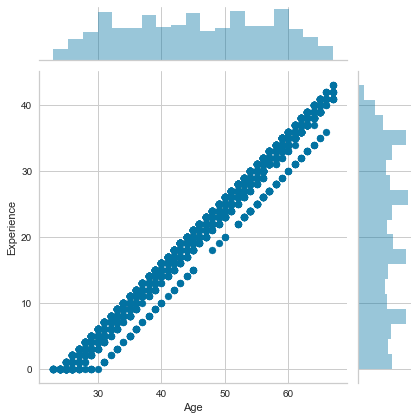

In [1698]:
sns.jointplot(data.Age, data.Experience)

### There is almost a perfect linear relationship between Age and Experience

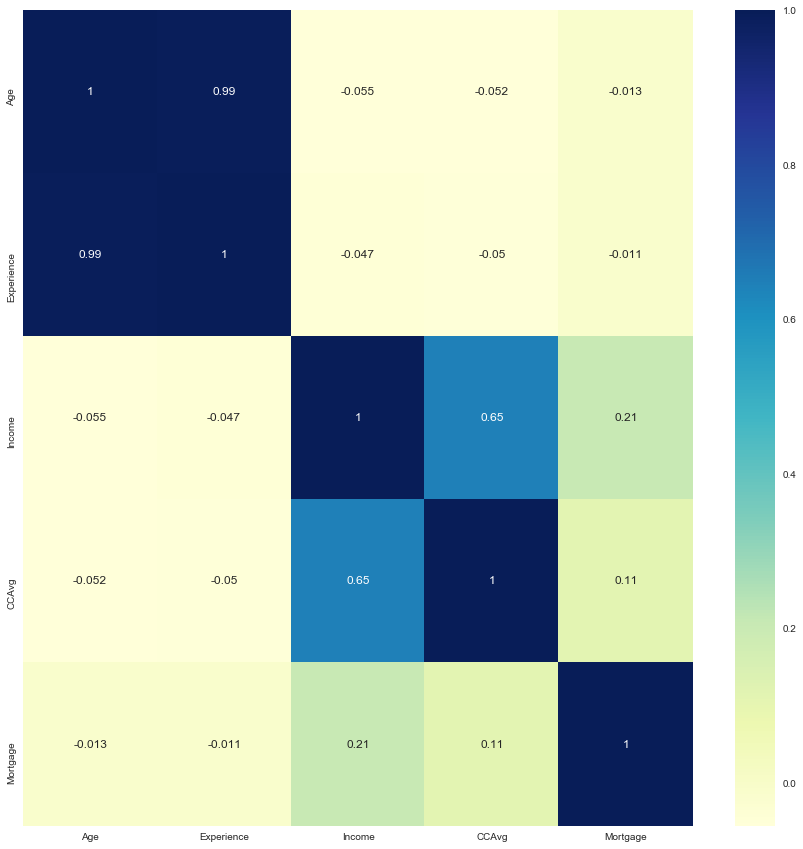

In [1699]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), annot = True, fmt='.2g',cmap= "YlGnBu")

**Insights:**
- `Age and Experience are almost perfectly correlated. We probably dont need both variables in the dataset, one of them will suffice`

- `CCAvg and Income have and high correlation but not too high, hence we should keep both columns`

In [1700]:
#data.drop('Experience',axis=1,inplace=True)
data.drop('Age',axis=1,inplace=True)

### 3. Split the data into training and test set in the ratio of 70:30 respectively (5 marks)

In [1701]:
from sklearn.model_selection import train_test_split

X = data.drop(['Personal Loan','ID', 'ZIP Code'], axis=1)     # Drop columns that are not needed 

#Convert categorical vriables to dummy variables
X = pd.get_dummies(X, drop_first=True)

Y = data['Personal Loan']   # Predicted class (1=True, 0=False) (1 X m)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
# 1 is just any random seed number

x_train.head()

,Experience,Income,CCAvg,Mortgage,Family_2,Family_3,Family_4,Education_2,Education_3,Securities Account_1,CD Account_1,topZIPs_1
1334,22,35,1.30,0,1,0,0,0,0,0,0,1
4768,14,39,2.00,0,0,0,0,1,0,0,0,0
65,35,131,3.80,0,0,0,0,0,0,0,0,0
177,3,65,1.80,244,0,0,1,1,0,0,0,0
4489,13,21,0.20,0,0,1,0,1,0,0,0,0


In [1702]:
print("{0:0.2f}% data is in training set".format((len(x_train)/len(data.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(data.index)) * 100))

70.00% data is in training set
30.00% data is in test set


### 4. Use Logistic Regression model to predict whether the customer will take personal loan or not. Print all the metrics related for evaluating the model performance (15 marks)

In [1703]:
from sklearn import metrics

from sklearn.linear_model import LogisticRegression

# Fit the model on train
model = LogisticRegression(solver="liblinear")
model.fit(x_train, y_train)

#predict on test
y_predict = model.predict(x_test)

# print the coefficients
coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

      0    1    2    3     4    5    6    7    8     9   10    11  intercept
0 -0.01 0.05 0.17 0.00 -0.33 1.57 0.93 2.61 2.77 -0.65 2.14 -0.03      -9.81


In [1704]:
## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = metrics.confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

Training accuracy 0.9591428571428572
Testing accuracy 0.95
Confusion Matrix


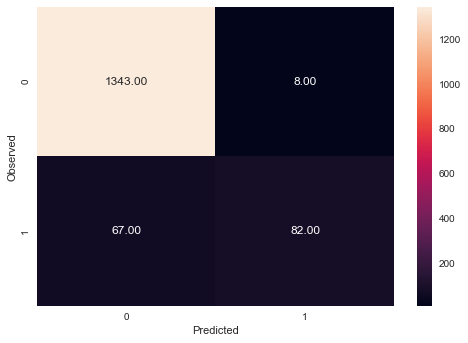

None

Recall: 0.5503355704697986
Precision: 0.9111111111111111
F1 Score: 0.6861924686192469
Roc Auc Score: 0.7722070154347512


In [1705]:
print("Training accuracy",model.score(x_train,y_train))  
print("Testing accuracy",model.score(x_test, y_test))
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:", metrics.recall_score(y_test,y_predict))
print("Precision:", metrics.precision_score(y_test,y_predict))
print("F1 Score:", metrics.f1_score(y_test,y_predict))
print("Roc Auc Score:", metrics.roc_auc_score(y_test,y_predict))

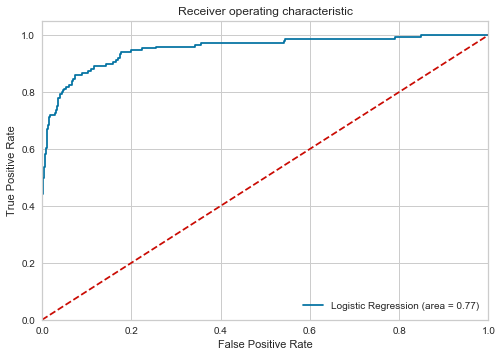

In [1706]:
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, model.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### 5. Check different parameters of Logistic Regression and give your reasoning whether the model performance is affected due to it or not? (10 marks)

In [1707]:
# Check Parameters of logistic regression
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [1708]:
# Running a loop to check different values of 'solver'
# all solver can be used with l2, only 'liblinear' and 'saga' works with both 'l1' and 'l2'

train_score=[]
test_score=[]
solver = ['newton-cg','lbfgs','liblinear','sag','saga']
for i in solver:
    model = LogisticRegression(random_state=42, penalty='l2', C = 0.75, solver=i,max_iter=1000)  # changing values of solver
    model.fit(x_train, y_train) 
    y_predict = model.predict(x_test)     
    train_score.append(round(model.score(x_train, y_train),3))
    test_score.append(round(model.score(x_test, y_test),3))
    
print(solver)
print(train_score)
print(test_score)

C:\Users\yoges\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
[0.962, 0.962, 0.958, 0.908, 0.903]
[0.953, 0.953, 0.949, 0.905, 0.896]


C:\Users\yoges\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [1709]:
train_score=[]
test_score=[]
solver = ['liblinear','saga']   # changing values of solver which works with 'l1'
for i in solver:
    model = LogisticRegression(random_state=42,penalty='l1', C = 0.75,solver=i)  #changed penalty to 'l1'
    model.fit(x_train, y_train) 
    y_predict = model.predict(x_test)     
    train_score.append(round(model.score(x_train, y_train),3))
    test_score.append(round(model.score(x_test, y_test),3))
    
print(solver)
print(train_score)
print(test_score)

['liblinear', 'saga']
[0.962, 0.891]
[0.955, 0.884]


C:\Users\yoges\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


**Insights:**
- `Highest accuracy is same 'l1' with 'liblinear' and 'l2' with 'newton-cg' or 'lbfgs'. We can choose any one
- `Even after increasing the number of iterations to 1000 the coefficients did not converge for 'sag' and 'saga' solvers. Hence do NOT go with those solvers

In [1710]:
model = LogisticRegression(random_state=7,penalty='l1',solver='liblinear')

model.fit(x_train, y_train) 

y_predict = model.predict(x_test)     

print("Training accuracy",model.score(x_train,y_train))  
print("Testing accuracy",model.score(x_test, y_test))

Training accuracy 0.962
Testing accuracy 0.9553333333333334


In [1711]:
# Running a loop to check different values of 'C'

train_score=[]                                 
test_score=[]
C = [0.01,0.1,0.25,0.5,0.75,1]
for i in C:
    model = LogisticRegression(random_state=7,penalty='l1', solver='liblinear', C=i)  # changing values of C
    model.fit(x_train, y_train) 
    y_predict = model.predict(x_test)     
    train_score.append(round(model.score(x_train,y_train),3)) # appending training accuracy in a blank list for every run of the loop
    test_score.append(round(model.score(x_test, y_test),3))   # appending testing accuracy in a blank list for every run of the loop
    
print("C values :", C)
print(train_score)
print(test_score)

C values : [0.01, 0.1, 0.25, 0.5, 0.75, 1]
[0.907, 0.954, 0.959, 0.961, 0.962, 0.962]
[0.902, 0.943, 0.951, 0.955, 0.955, 0.955]


**Insights:**
- `Best testing accuracy is obtained for C=1.0

Training accuracy is: 0.962
Testing accuracy is: 0.9553333333333334
Confusion Matrix


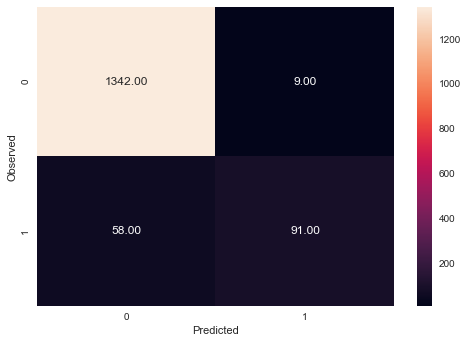

None

Recall is: 0.610738255033557
Precision is: 0.91
F1 Score is: 0.7309236947791165
Roc Auc Score is: 0.8020382614916121


In [1712]:
#Therefore final model is
model = LogisticRegression(random_state=7,penalty='l1', solver='liblinear',C=1) 
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
print("Training accuracy is:",model.score(x_train,y_train))  
print("Testing accuracy is:",model.score(x_test, y_test))
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall is:",metrics.recall_score(y_test,y_predict))
print("Precision is:",metrics.precision_score(y_test,y_predict))
print("F1 Score is:",metrics.f1_score(y_test,y_predict))
print("Roc Auc Score is:",metrics.roc_auc_score(y_test,y_predict))

**Insights**
`The performance of the Model was improved by trying different combinations of model parameters and optimizing them`
- **Training accuracy** increased from 0.959 to 0.962
- **Testing accuracy** increased from 0.95 to 0.955
- **Recall** increased from 0.55 to 0.611
- **Precision** remained the same at 0.91
- **F1 Score** increased from 0.686 to 0.731
- **Roc Auc Score** increased from 0.772 to 0.802

### 6. Give Business understanding of your model? (5 marks)

#### BUSINESS INSIGHTS

`Confusion matrix means`

*True Positive (observed=1,predicted=1):*
Predicted that personal loan will be granted and the customer was eligibile for loan

*False Positive (observed=0,predicted=1):*
Predicted that personal loan will be granted and the customer was not eligibile for loan

*True Negative (observed=0,predicted=0):*
Predicted that personal loan will not be granted and the customer was not eligibile for loan

*False Negative (observed=1,predicted=0):*
Predicted that personal loan will not be granted and the customer was eligibile for loan

The bank wants to offer personal loans to customers based on previously collected statistics i.e. **high True Positive rate and high True Negative rate**, if TP & TN are high, the bank's campaign will be deemed successful. Hence **Accuracy & Precision are the important metrics** here.

In case of False negative bank will lose a few customers but that is okay as long as the True Negative rate is high. Identifying the customers who are not likely to accept the Personal Loan offer will eliminate wasteful marketing spend. Recall is an important metric but even after repeated analysis, dropping columns, adding dummy variables and optimizing the parameters, it was found that it was not possible to get a Recall rate much above 60%. 

After achieving the desired accuracy the model can be deployed for practical use to help predict which customer should be offered personal loans and who should not. The eligible customers can be then targeted by the campaign.

In [1713]:
#Build the logistic regression model
import statsmodels.api as sm

logit = sm.Logit(y_train, sm.add_constant(x_train))
lg = logit.fit()

Optimization terminated successfully.
         Current function value: 0.110497
         Iterations 9


In [1714]:
#Summary of logistic regression
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:          Personal Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3487
Method:                           MLE   Df Model:                           12
Date:                Fri, 18 Sep 2020   Pseudo R-squ.:                  0.6470
Time:                        02:11:03   Log-Likelihood:                -386.74
converged:                       True   LL-Null:                       -1095.5
Covariance Type:            nonrobust   LLR p-value:                2.415e-296
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -14.0281      0.742    -18.911      0.000     -15.482     -12.574
Experience               0.0064      0.008      0.754      0.451      -0.010       0.023
Income      

### Interpretation of Pseudo R^2

A pseudo R^2 of 65% indicates that 65% of the uncertainty of the intercept only model is explained by the full model

In [1715]:
#Calculate Odds Ratio, probability
##create a data frame to collate Odds ratio, probability and p-value of the coef
lgcoef = pd.DataFrame(lg.params, columns=['coef'])
lgcoef.loc[:, "Odds_ratio"] = np.exp(lgcoef.coef)
lgcoef['probability'] = lgcoef['Odds_ratio']/(1+lgcoef['Odds_ratio'])
lgcoef['pval']=lg.pvalues
pd.options.display.float_format = '{:.2f}'.format
# FIlter by significant p-value (pval <0.1) and sort descending by Odds ratio
lgcoef = lgcoef.sort_values(by="Odds_ratio", ascending=False)
pval_filter = lgcoef['pval']<=0.1
lgcoef[pval_filter]

,coef,Odds_ratio,probability,pval
Education_3,4.31,74.26,0.99,0.00
Education_2,4.08,58.87,0.98,0.00
CD Account_1,2.73,15.32,0.94,0.00
Family_3,2.53,12.51,0.93,0.00
Family_4,1.61,5.01,0.83,0.00
CCAvg,0.24,1.27,0.56,0.00
Income,0.06,1.07,0.52,0.00
Securities Account_1,-0.80,0.45,0.31,0.04
const,-14.03,0.00,0.00,0.00


**Insights:**
- `Customers with education higher than undergraduate degree have a significantly higher chance (98%+) of accepting the personal loan offer
- `Customers having a CD Account with the bank have a 94% chance of accepting the personal loan offer
- `Customers with Family size of 3 have a 93% chance of accepting the personal loan offer
- `Customers with Family size of 4 have a 83% chance of accepting the personal loan offer